dog
dict_keys(['gallina', 'ragno', 'gatto', 'farfalla', 'mucca', 'cavallo', 'cane', 'pecora', 'scoiattolo', 'elefante'])


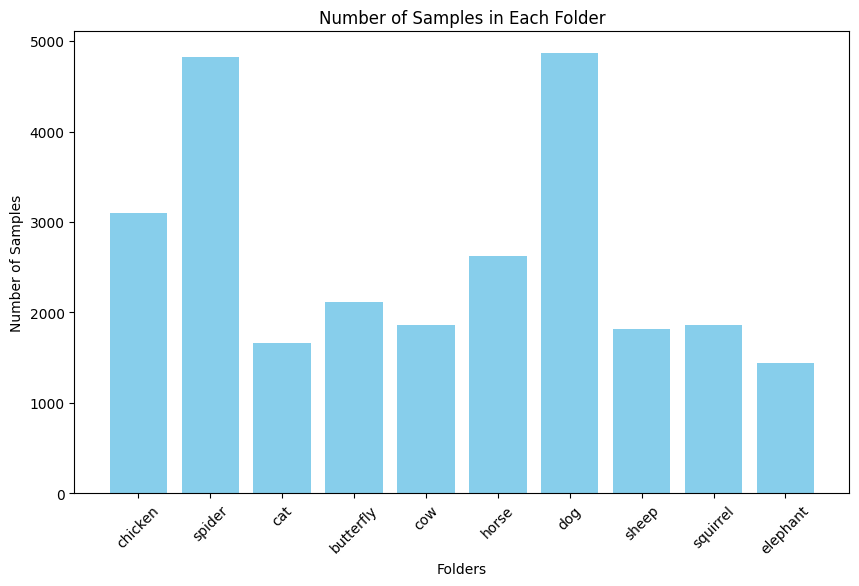

In [15]:
import os

import matplotlib.pyplot as plt

# Path to the folder containing the subfolders
folder_path = "archive/raw-img/"

# Get the list of subfolders
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Count the number of samples in each subfolder
sample_counts = {os.path.basename(subfolder): len(os.listdir(subfolder)) for subfolder in subfolders}

# Plot the histogram
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo", "ragno": "spider"}
print(translate['cane'])
# Translate the keys in sample_counts to English
print(sample_counts.keys())
sample_counts_translated = {translate[key]: value for key, value in sample_counts.items()}
plt.figure(figsize=(10, 6))
plt.bar(sample_counts_translated.keys(), sample_counts_translated.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Folder')
plt.xticks(rotation=45)
plt.show()

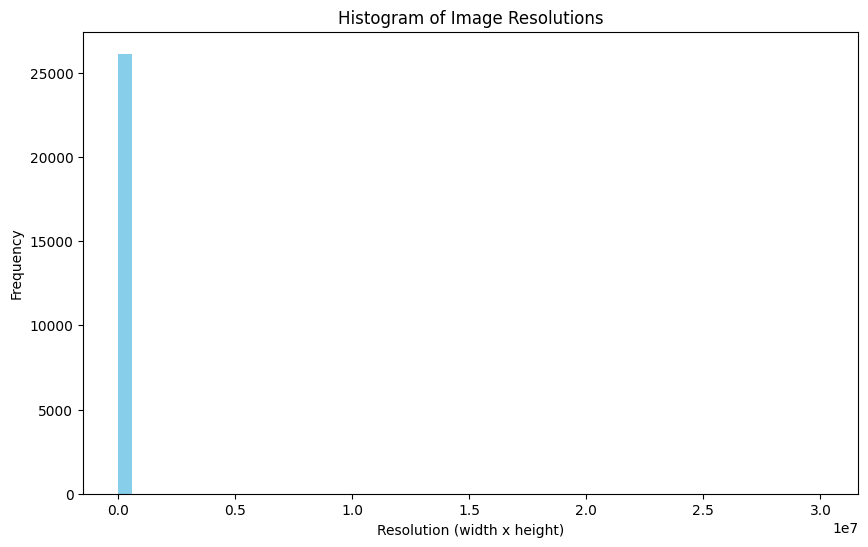

[67500 50700 67500 ... 56400 67500 67500]


In [17]:
from PIL import Image
import numpy as np

# Function to get image resolutions
def get_image_resolutions(folder_path):
    resolutions = []
    for subfolder in subfolders:
        for filename in os.listdir(subfolder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(subfolder, filename)
                with Image.open(image_path) as img:
                    resolutions.append(img.size)
    return resolutions

# Get image resolutions
image_resolutions = get_image_resolutions(folder_path)

# Convert resolutions to a numpy array for easier manipulation
resolutions_array = np.array(image_resolutions)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(resolutions_array[:, 0] * resolutions_array[:, 1], bins=50, color='skyblue')
plt.xlabel('Resolution (width x height)')
plt.ylabel('Frequency')
plt.title('Histogram of Image Resolutions')
plt.show()